In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats  #to plot QQplot

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score #for cross validation

from sklearn.preprocessing import FunctionTransformer 

In [2]:
df=pd.read_csv("train.csv",usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [6]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [7]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [9]:
x=df.iloc[:,1:3]
y=df.iloc[:,0]

In [10]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
X_train

,Age,Fare
331,45.500000,28.5000
733,23.000000,13.0000
382,32.000000,7.9250
704,26.000000,7.8542
813,6.000000,31.2750
...,...,...
106,21.000000,7.6500
270,29.699118,31.0000
860,41.000000,14.1083
435,14.000000,120.0000


C:\Users\AKSHATA\AppData\Local\Temp\ipykernel_5776\2399181786.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


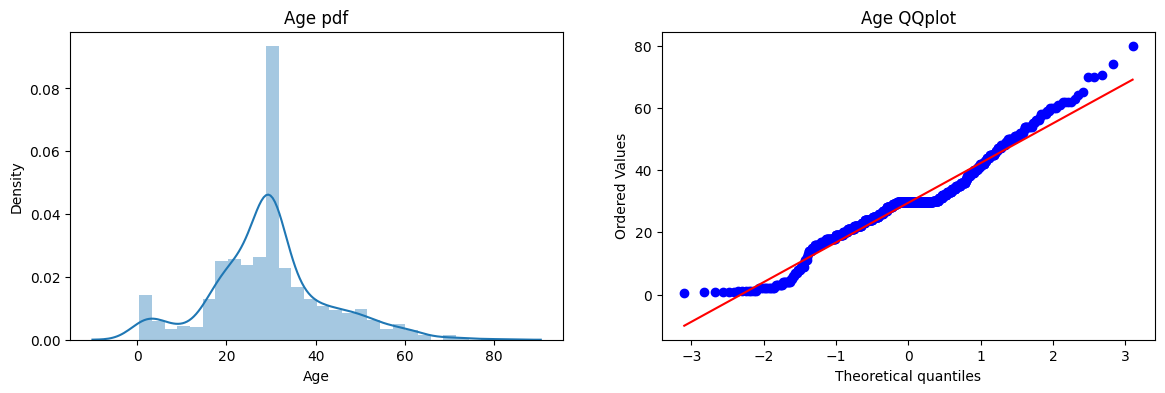

In [12]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age pdf')

plt.subplot(122)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Age QQplot')

plt.show()

## close to normally distribution

C:\Users\AKSHATA\AppData\Local\Temp\ipykernel_5776\3369621203.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


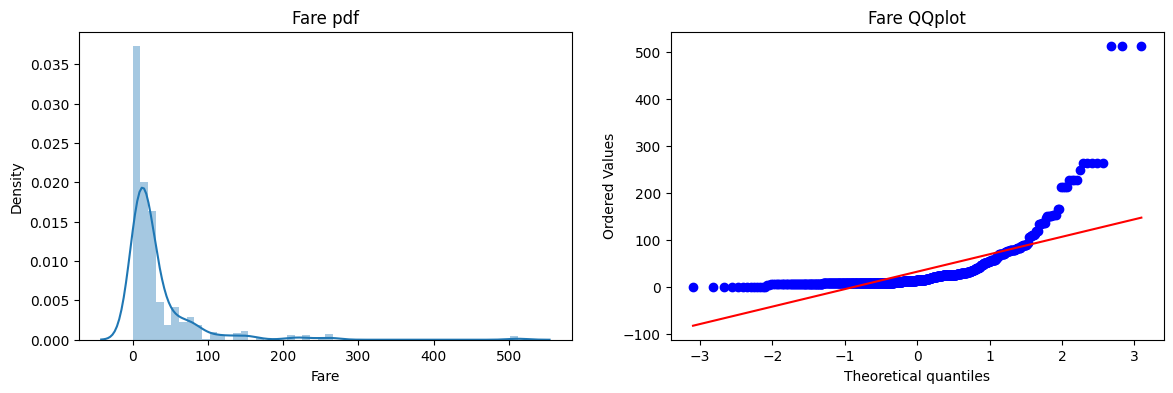

In [13]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare pdf')

plt.subplot(122)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title('Fare QQplot')

plt.show()

## it is right skiwed very big difference with normal distribution

In [14]:
lr=LogisticRegression()
clf=DecisionTreeClassifier()


In [16]:
lr.fit(X_train,y_train)


LogisticRegression()

In [17]:
clf.fit(X_train,y_train)


DecisionTreeClassifier()

In [18]:
y_pred=lr.predict(X_test)
y_pred1=clf.predict(X_test)

In [19]:
print("accuracy lr",accuracy_score(y_test,y_pred))
print("accuracy clf",accuracy_score(y_test,y_pred1))

accuracy lr 0.6480446927374302
accuracy clf 0.659217877094972


In [20]:
trf=FunctionTransformer(func=np.log1p) #np.log only apply log then when data is 0 then difficult log1p add 1 to value so not any value will be 0


In [21]:
X_train_transformed=trf.fit_transform(X_train)
X_test_transformed=trf.transform(X_test)

In [23]:
lr=LogisticRegression()
clf=DecisionTreeClassifier()

lr.fit(X_train_transformed,y_train)
clf.fit(X_train_transformed,y_train)

y_pred=lr.predict(X_test_transformed)
y_pred1=clf.predict(X_test_transformed)

print("accuracy lr",accuracy_score(y_test,y_pred))
print("accuracy clf",accuracy_score(y_test,y_pred1))


### accuracy is increased after transformation

accuracy lr 0.6815642458100558
accuracy clf 0.6815642458100558


In [27]:
X_transformed=trf.fit_transform(x)
lr=LogisticRegression()
clf=DecisionTreeClassifier()

print("lr",np.mean(cross_val_score(lr,X_transformed,y,scoring="accuracy",cv=10))) #we perform 10 times train test field and calculate accuracy take mean of all accuracies 

print("clf",np.mean(cross_val_score(clf,X_transformed,y,scoring="accuracy",cv=10))) #we perform 10 times train test field and calculate accuracy take mean of all accuracies 


lr 0.678027465667915
clf 0.661123595505618


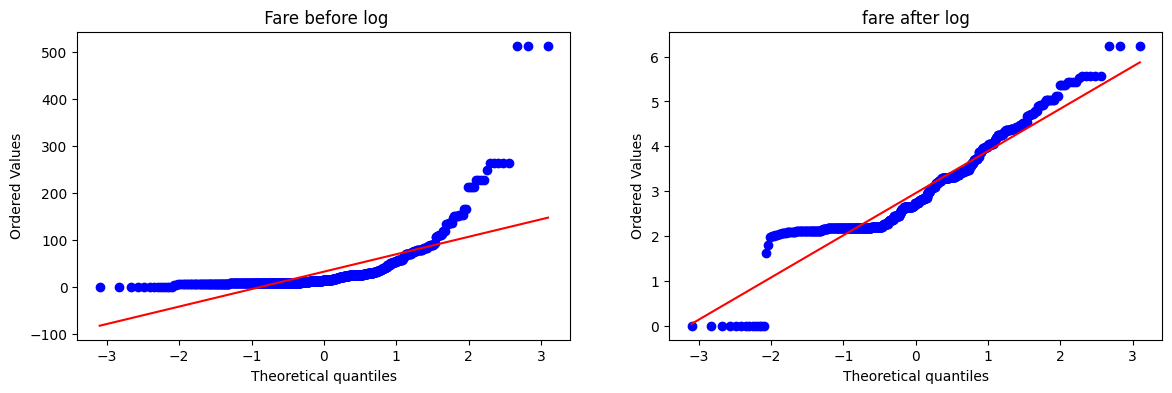

In [30]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title(' Fare before log') 

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'],dist='norm',plot=plt)
plt.title('fare after log')

plt.show()

## close to normally distribution

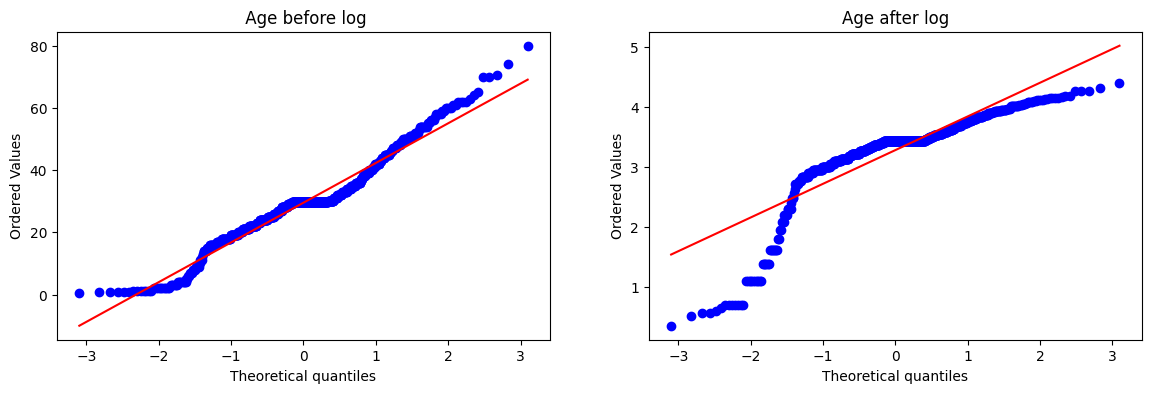

In [32]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title(' Age before log') 

plt.subplot(122)
stats.probplot(X_train_transformed['Age'],dist='norm',plot=plt)
plt.title('Age after log')

plt.show()

## performace degreaded before transformation it is close to normaldistribution 

In [35]:
trf2=ColumnTransformer([
    ('log',FunctionTransformer(np.log1p),['Fare'])
],remainder='passthrough')

X_train_transformed2=trf2.fit_transform(X_train)
X_test_transformed2=trf2.transform(X_test)

In [36]:
lr=LogisticRegression()
clf=DecisionTreeClassifier()

lr.fit(X_train_transformed2,y_train)
clf.fit(X_train_transformed2,y_train)

y_pred=lr.predict(X_test_transformed2)
y_pred1=clf.predict(X_test_transformed2)

print("accuracy lr",accuracy_score(y_test,y_pred))
print("accuracy clf",accuracy_score(y_test,y_pred1))


### accuracy is same after only transform to Fare

accuracy lr 0.6703910614525139
accuracy clf 0.6536312849162011


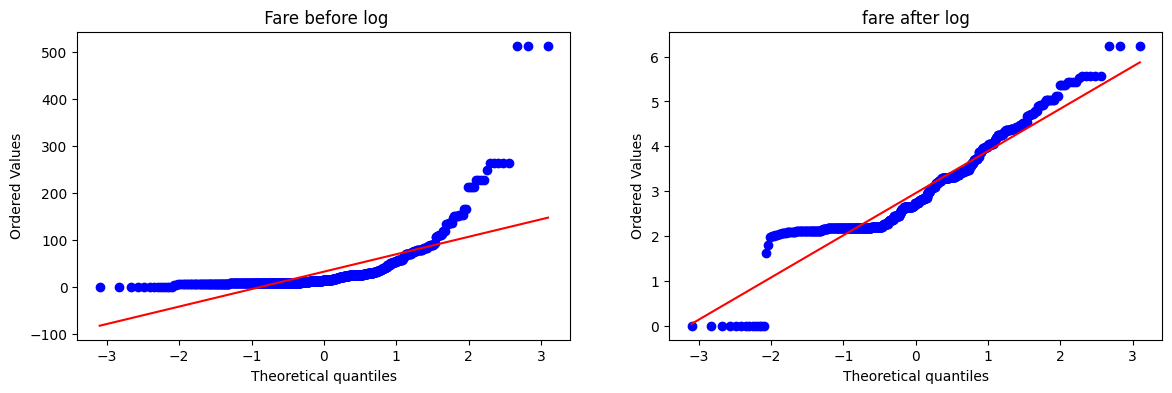

In [44]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title(' Fare before log') 

plt.subplot(122)
stats.probplot(X_train_transformed2[:,0],dist='norm',plot=plt)
plt.title('fare after log')

plt.show()

## close to normally distribution

In [45]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show(

Accuracy 0.6589013732833957


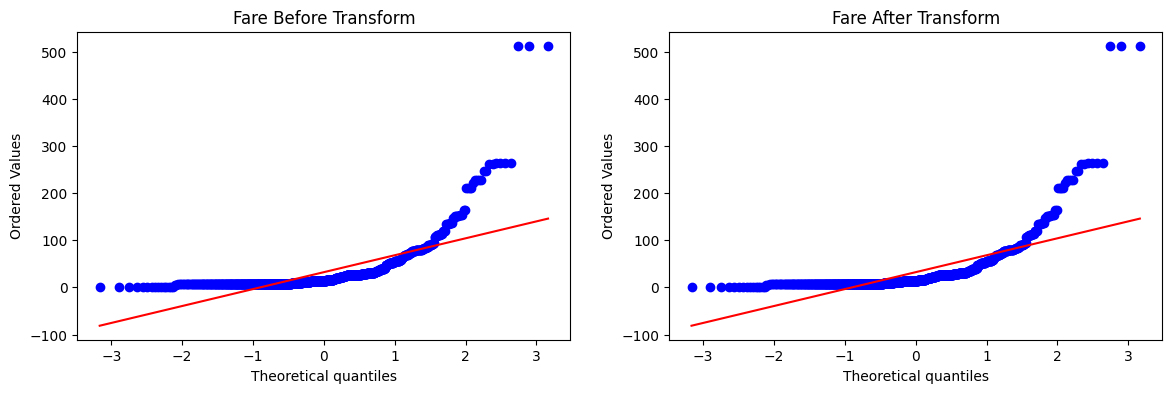

In [46]:
apply_transform(lambda x: x)

Accuracy 0.6442446941323345


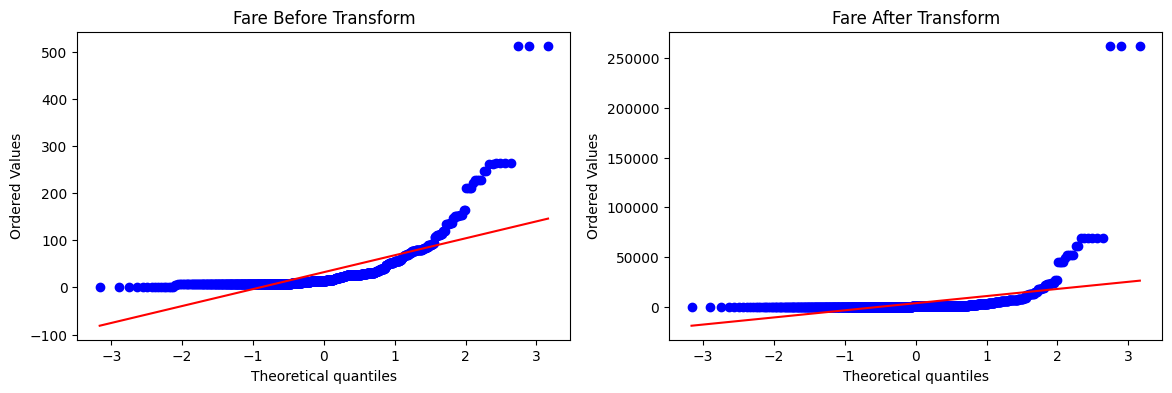

In [47]:
apply_transform(lambda x: x**2) #reduce accuracy

Accuracy 0.6589013732833957


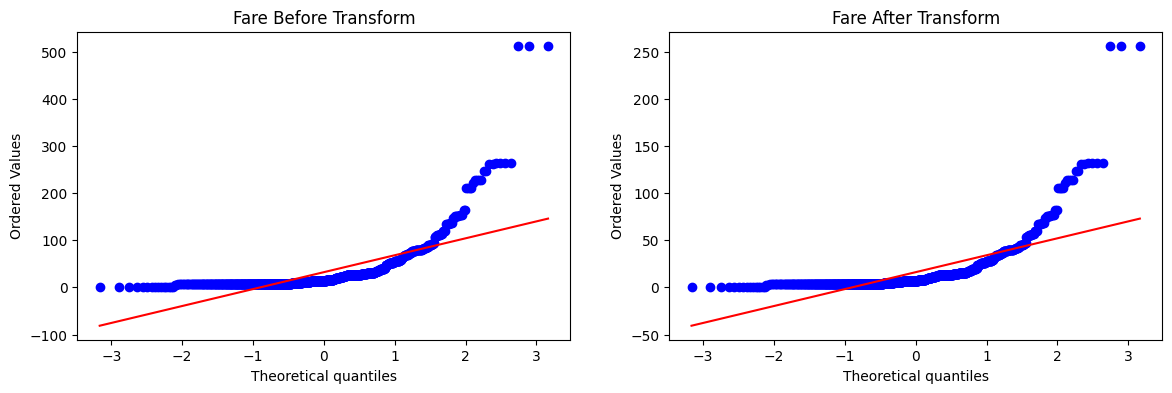

In [49]:
apply_transform(lambda x: x**1/2)

Accuracy 0.61729088639201


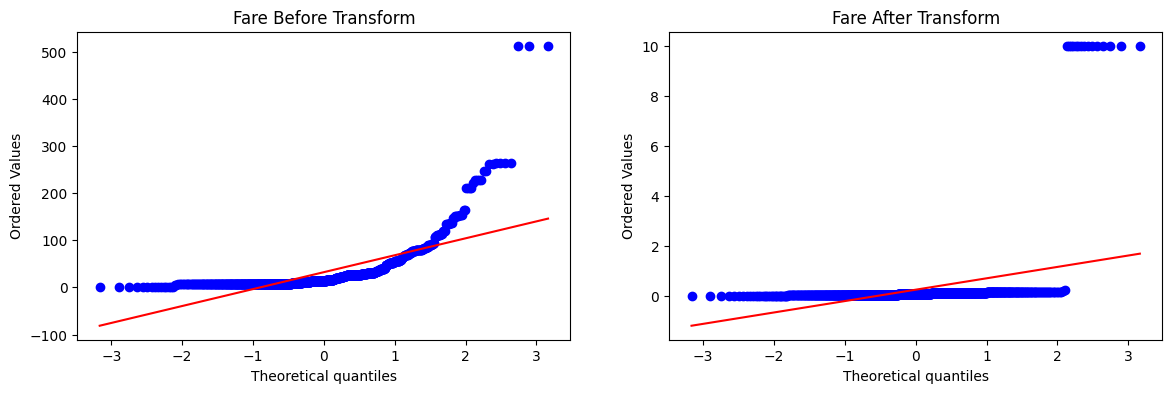

In [52]:
apply_transform(lambda x: 1/(x+0.1)) #reciprocal

## here log transform perform well it gives 67 accuracy beacuse this is right skiwed data and for right skiewed we use log transform